# Problem set 2 

## 155 pts

## For problems 1, 2, 4: all functions that you are asked to implement, you have to complete in separate file ```pset2.py```, where we provide signatures of the required functions . Also only this ```py```-file you have to submit in the bot to check correctness of your implementations.

## For problem 3: see instructions in text

## Problem 1 (LU decomposition) 35 pts

### 1. LU for band matrices 

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of sparse matrices –– band matrices with the bandwidth $m$ equal to 3 or 5 which called tridiagonal and pentadiagonal respectively.

- (5 pts) Write a function ```band_lu(diag_broadcast, n)``` which computes LU decomposition for tridiagonal or pentadiagonal matrix with given diagonal values. 
For example, input parametres ```(diag_broadcast = [1,-2,1], n = 4)``` mean that we need to find LU decomposition for the triangular matrix of the form:

$$A = \begin{pmatrix}
-2 & 1 & 0 & 0\\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -2 \\
\end{pmatrix}.$$

As an output it is considered to make ```L``` and ```U``` - 2D arrays representing diagonals in factors $L$ (```L[0]``` keeps first lower diagonal, ```L[1]``` keeps second lower, ...), and $U$ (```U[0,:]``` keeps main diagonal, ```U[:,1]``` keeps first upper, ...). More details you can find in comments to the corresponding function in ```pset2.py``` 
- (2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.

In [15]:
# Implement function in the ```pset2.py``` file
from pset2 import band_lu
from scipy.sparse import diags # can be used with broadcasting of scalars if desired dimensions are large
import numpy as np
from scipy.linalg import lu
import scipy as sp
from scipy import sparse

In [4]:
import time
scipy_times = []
ns = [10,50,100,200,300,400,500,1000]
for n in ns:
    start = time.time()
    ex = np.ones(n);
    a = sp.sparse.spdiags(np.vstack((ex,  -2*ex, ex)), [-1, 0, 1], n, n).todense()
    lu(a)
    end = time.time()
    scipy_times.append(end-start)

In [5]:
my_times = []
for n in ns:
    start = time.time()
    band_lu([1,2,-1,2,1], n)
    end = time.time()
    my_times.append(end-start)

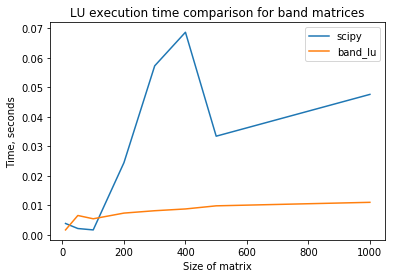

In [7]:
import matplotlib.pyplot as plt
plt.plot(ns, scipy_times)
plt.plot(ns, my_times)

plt.legend(['scipy', 'band_lu'])
plt.title('LU execution time comparison for band matrices')
plt.xlabel('Size of matrix')
plt.ylabel('Time, seconds')
plt.show()

We can see that band_lu is more stable and executes faster for bigger matrcies

### 2. Completing the proof of existence of LU 

Some details in lecture proofs about $LU$ were omitted. Let us complete them here.
- (5 pts) Prove that if $LU$ decomposition exists, then matrix is strictly regular.
- (5 pts) Prove that if $A$ is a strictly regular matrix, then $A_1 = D - \frac 1a b c^T$ (see lectures for notations) is also strictly regular.

*(5 pts) Prove that if  𝐿𝑈  decomposition exists, then matrix is strictly regular.*

Strict regularity means that every principal minor is non-singular (eg determinant is not zero).

Let's consider the minor $A_{kk}$ which means that we take first $k$ rows and cols of matrix $A$. And...
$$A_{kk} = L_{kk} \cdot U_{kk}$$
$$det\ A_{kk}=det\ L_{kk} \cdot det\ U_{kk}$$
We just need to proof that $det\ L_{kk}$ and $det\ U_{kk}$ are non zero. Let's proof for $L_{kk}$ by induction ($U_{kk}$ proof looks very simillar).

For example, $L_{33}$ looks like
$L_{33} = \begin{pmatrix}
l_{11} & 0 & 0\\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{33}
\end{pmatrix}.$ 
Where $l_{kk}$ are non-zero elements


**Base of induction**

For $k=1$ we have
$det\ L_{11} = l_{11}$ and $l_{11}$ is non zero element

For $k=2$ we have
$det\ L_{22} = l_{22}\cdot l_{11} - l_{21} \cdot 0$ And we know that diagonal elements are non-zero, hence $det\ L_{22}$ is also non zero

**Induction step**
$k=n$. Let's consider that $L_{nn}$ is non zero. Then laying out on a column $n+1$ which has $n$ zeros and $l_{(n+1)(n+1)}$ non zero element on the $n+1$ place we can see that
$$det\ L_{(n+1)(n+1)} = l_{(n+1)(n+1)}\cdot(-1)^{2n+2} \cdot \det L_{nn} = l_{(n+1)(n+1)}\cdot det\ L_{nn}$$
So now we can see that $det\ L_{(n+1)(n+1)} \neq 0$.

Performing simillar proof for $U_{kk}$ we get $det\ A_{kk} \neq 0\ \forall k \in N$. So $A$ is strictly regular 

*Prove that if  𝐴  is a strictly regular matrix, then  $𝐴_1=𝐷−\frac{1}{a}𝑏𝑐^𝑇$  (see lectures for notations) is also strictly regular.*

$a$ is just a number, so let's entitle $-\frac{1}{a}b \equiv u$. Now we have
$$A_{1}=D-uc^T$$

$$det\ (D + uc^T) = det\ \begin{pmatrix}
D+uc^T & 0\\
0 & 1
\end{pmatrix} = det\ \begin{pmatrix}
D+uc^T & 0\\
0 & 1
\end{pmatrix} \begin{pmatrix}
I & 0\\
-c^T & 1
\end{pmatrix} =det\ \begin{pmatrix}
I & u\\
0 & 1
\end{pmatrix} \begin{pmatrix}
D+uc^T & 0\\
0 & 1
\end{pmatrix} \begin{pmatrix}
I & 0\\
-c^T & 1
\end{pmatrix} = det\ \begin{pmatrix}
D & u\\
-c^T & 1
\end{pmatrix} = det\ D + c^T u \neq 0$$
$D$ is also strictly regular, so $𝐴_1=𝐷−\frac{1}{a}𝑏𝑐^𝑇$ is strictrly regular

### 3. Stability of LU 

Let
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* (5 pts) Find analytically LU decomposition with and without pivoting for the matrix $A$.
* (3 pts) Explain, why can the LU decomposition fail to approximate factors $L$ and $U$ for $|\varepsilon|\ll 1$ in computer arithmetic?

*(5 pts) Find analytically LU decomposition with and without pivoting for the matrix  $𝐴$.*

**with pivoting**
At first, let's do pivoting
$$
\begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix} \longrightarrow
\begin{pmatrix}
1 & 1 & 1\\
\varepsilon & 1 & 0 \\
0 & 1 & 1
\end{pmatrix}
$$
Now on the main diagonal we have max values. Pivoting is ended. This gives us
$$P=
\begin{pmatrix}
0 & 1 & 0\\
1 & 0 & 0 \\
0 & 0 & 1
\end{pmatrix}=P^{-1}
$$

$$
A=PLU
$$

$$
P^{-1}A=LU
$$

$$
\begin{pmatrix}
1 & 1 & 1\\
\varepsilon & 1 & 0 \\
0 & 1 & 1
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 & 0\\
l_{10} & 1 & 0 \\
l_{20} & l_{21} & 1
\end{pmatrix}
\begin{pmatrix}
u_{00} & u_{01} & u_{02}\\
0 & u_{11} & u_{12} \\
0 & 0 & u_{22}
\end{pmatrix}
$$

Now let's start gauss process
$$
\begin{pmatrix}
1 & 1 & 1\\
\varepsilon & 1 & 0 \\
0 & 1 & 1
\end{pmatrix}\ 
u_{00}=1, u_{01} = 1, u_{02} = 1
$$

$$
\begin{pmatrix}
1 & 1 & 1\\
0 & 1-\varepsilon & -\varepsilon \\
0 & 1 & 1
\end{pmatrix}\ l_{10} = \varepsilon, l_{20}=0, u_{11}=1-\varepsilon, u_{12} = -\varepsilon 
$$

$$
\begin{pmatrix}
1 & 1 & 1\\
0 & 1-\varepsilon & -\varepsilon \\
0 & 0 & 1+\frac{\varepsilon}{1-\varepsilon}
\end{pmatrix}\ l_{21} = \frac{1}{1-\varepsilon}, u_{22} = 1+\frac{\varepsilon}{1-\varepsilon}
$$

$$
P^{-1}A = 
\begin{pmatrix}
1 & 0 & 0\\
\varepsilon & 1 & 0 \\
0 & \frac{1}{1-\varepsilon} & 1
\end{pmatrix}
\begin{pmatrix}
1 & 1 & 1\\
0 & 1-\varepsilon & -\varepsilon \\
0 & 0 & 1+\frac{\varepsilon}{1-\varepsilon}
\end{pmatrix}
$$



**without pivoting**
$$
\begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 & 0\\
l_{10} & 1 & 0 \\
l_{20} & l_{21} & 1
\end{pmatrix}
\begin{pmatrix}
u_{00} & u_{01} & u_{02}\\
0 & u_{11} & u_{12} \\
0 & 0 & u_{22}
\end{pmatrix}
$$

$$
\begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}\ u_{00}=\varepsilon, u_{01}=1, u_{02}=0
$$

$$
\begin{pmatrix}
\varepsilon & 1 & 0\\
0 & 1-\frac{1}{\varepsilon} & 1 \\
0 & 1 & 1
\end{pmatrix}\ l_{10}=\frac{1}{\varepsilon}, l_{20}=0, u_{11}=1-\frac{1}{\varepsilon}, u_{12}=1
$$

$$
\begin{pmatrix}
\varepsilon & 1 & 0\\
0 & 1-\frac{1}{\varepsilon} & 1 \\
0 & 0 & 1-\frac{1}{1-\frac{1}{\varepsilon}}
\end{pmatrix}\ l_{21}=\frac{1}{1-\frac{1}{\varepsilon}}, u_{22}=1-\frac{1}{1-\frac{1}{\varepsilon}}
$$

$$
\begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 & 0\\
\frac{1}{\varepsilon} & 1 & 0 \\
0 & \frac{1}{1-\frac{1}{\varepsilon}} & 1
\end{pmatrix}
\begin{pmatrix}
\varepsilon & 1 & 0\\
0 & 1-\frac{1}{\varepsilon} & 1 \\
0 & 0 & 1-\frac{1}{1-\frac{1}{\varepsilon}}
\end{pmatrix}
$$

*(3 pts) Explain, why can the LU decomposition fail to approximate factors  $𝐿$  and  $𝑈 $ for  |𝜀|≪1  in computer arithmetic?*

Because of the details of floating point and division implementation in computers. In $U$ matrix we'll have value $1-\frac{1}{10^{-18}}$ As you can see below $\frac{1}{10^{-18}} \neq 10^{18}$. Hence in the final result after multiplication we'll get a very big error. This was shown in the 7th lection.

In [14]:
1/1e-18

9.999999999999999e+17

In [15]:
1-1/1e-18

-9.999999999999999e+17

In [19]:
1-1e18

-1e+18

### 4. Block LU 

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called <font color='red'> Schur complement </font> of the block $A_{11}$.
* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.
* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$

*(2 pts) Using block elimination find matrix  𝑆  and right-hand side  𝑓2^  so that  𝑢2  can be found from  𝑆𝑢2=𝑓2^ . Note that the matrix  𝑆  is called Schur complement of the block  𝐴11 .*

$$
     \begin{bmatrix} I & 0 \\ -A_{21} A_{11}^{-1} & I \end{bmatrix} \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} I & 0 \\ -A_{21} A_{11}^{-1} & I \end{bmatrix} \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

$$
     \begin{bmatrix} A_{11} & A_{12} \\ 0 & A_{22}- A_{21}A_{11}^{-1}A_{12} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ -A_{21}A_{11}^{-1}f_1 + f_2 \end{bmatrix}.
$$

$$S = A_{22}- A_{21}A_{11}^{-1}A_{12}$$
$$\hat{f_2} = -A_{21}A_{11}^{-1}f_1 + f_2 $$

*(4 pts) Let matrix  𝐹∈ℝ𝑚×𝑛  and  𝐺∈ℝ𝑛×𝑚 . Prove that det(𝐼𝑚−𝐹𝐺)=det(𝐼𝑛−𝐺𝐹).*

$$ A = 
\begin{bmatrix}
I_m & F \\
G & I_n
\end{bmatrix}
 = 
\begin{bmatrix}
I_m & O \\
G & I_n
\end{bmatrix}
\begin{bmatrix}
I_m & F \\
O & I_n - GF
\end{bmatrix} = CD
$$

$$\det(A) = \det(C)\det(D) = 1 \cdot \det(I_n - GF)$$

$$A = 
\begin{bmatrix}
I_m & F \\
G & I_n
\end{bmatrix}= 
\begin{bmatrix}
I_m & F \\
O & I_n
\end{bmatrix}
\begin{bmatrix}
I_m - FG & O \\
G & I_n
\end{bmatrix} = C'D'
$$

$$\det(A) = \det(C')\det(D') = 1 \cdot \det(I_m - FG)$$

$$\det(I_m - FG) = \det(I_n - GF)$$

## Problem 2 (QR decomposition) 30 pts

### 1. Standard Gram-Schmidt algorithm
Our goal is to orthogonalize a system of linearly independent vectors $v_1,\dots,v_n$.
The standard algorithm for this task is the Gram-Schmidt process:

$$
\begin{split}
u_1 &= v_1, \\
u_2 &= v_2 - \frac{(v_2, u_1)}{(u_1, u_1)} u_1, \\
\dots \\
u_n &= v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}.
\end{split}
$$

Obtained $u_1, \dots, u_n$ are orthogonal vectors in exact arithmetics. Then to make the system orthonormal you should divide each of the vectors by its norm: $u_i := u_i/\|u_i\|$.
The Gram-Schmidt process can be considered as a QR decomposition. Let us show that.

* (2 pts) Write out what is matrices $Q$ and $R$ obtained in the process above. 

* (5 pts) Implement in the ```pset2.py``` the described Gram-Schmidt algorithm as a function ```gram_schmidt_qr(A)``` that takes a rectangular matrix ```A``` and outputs ```Q,R```.

* (3 pts) Create a square [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) $V\in\mathbb{R}^{n\times n},\ n = 20$ defined by the vector $x$: ```x = np.linspace(0,1,n)``` (components of $x$ are spaced uniformly between 0 and 1). 
The loss of orthogonality can be described by the following error: $\|Q^{\top}Q-I\|_2$, where $Q^{\top}Q$ is called a Gram matrix. Compute QR decomposition of the created matrix $V$ with function that you have implemented and calculate error $\|Q^{\top}Q-I\|_2$. Comment on the result.

* (5 pts) The observed loss of orthogonality is a problem of this particular algorithm. Luckily, there is [a simple improvement to the algorithm above](https://en.wikipedia.org/wiki/Gram–Schmidt_process#Numerical_stability) that reduces the loss of orthogonality. Implement this modification in the ```pset2.py``` as a function ```modified_gram_schmidt_qr(A)``` such that input and output are similar to ```gram_schmidt_qr(A)```. 
* (3 pts) Compute QR decomposition of the matrix $V$ from the previous task with the function ```modified_gram_schmidt_qr(A)```.
Compute error $\|Q^{\top}Q-I\|_2$. Compare this error to the error obtained with a "pure" Gram-Schmidt and comment on the result.

*(2 pts) Write out what is matrices  𝑄  and  𝑅  obtained in the process above.*

$$A = \begin{pmatrix}
v_1 & v_2 & \dotso & v_n
\end{pmatrix} = QR = \begin{pmatrix}
e_1 & e_2 & \dotso & e_n
\end{pmatrix} \begin{pmatrix}
\langle v_1, e_1 \rangle & \langle v_2, e_1 \rangle & \dotso & \langle v_n, e_1 \rangle \\
0 & \langle v_2, e_2 \rangle & \dotso & \langle v_n, e_2 \rangle \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dotso & \langle v_n, e_n \rangle
\end{pmatrix}$$

In [11]:
"""
# INPUT : rectangular matrix A
# OUTPUT: matrices Q - orthogonal and R - upper triangular such that A = QR
def gram_schmidt_qr(A): # 5 pts
    assert A.shape[0] >= A.shape[1], 'm is not >= n'
    new_vectors = np.zeros((A.shape[0],A.shape[1]))
    for i in range(A.shape[1]):
        new_vectors[:,i] = A[:,i]
        for j in range(i):
            new_vectors[:,i] -= (np.dot(A[:,i], new_vectors[:,j])/np.dot(new_vectors[:,j],new_vectors[:,j])) * new_vectors[:,j]
    
    # normalization
    for i in range(new_vectors.shape[1]):
        new_vectors[:,i] /= np.linalg.norm(new_vectors[:,i])
    Q = new_vectors
    R = np.zeros((A.shape[1],A.shape[1]))
    for i in range(A.shape[1]):
        for j in range(i, A.shape[1]):
            R[i,j] = np.dot(A[:,j], new_vectors[:,i])
    return Q, R

def modified_gram_schmidt_qr(A): # 5 pts
    assert A.shape[0] >= A.shape[1], 'm is not >= n'
    new_vectors = np.zeros((A.shape[0],A.shape[1]))
    for i in range(A.shape[1]):
        new_vectors[:,i] = A[:,i]
        if i > 0:
            new_vectors[:,i] -= (np.dot(A[:,i], new_vectors[:,0])/np.dot(new_vectors[:,0],new_vectors[:,0])) * new_vectors[:,0]
        
        for j in range(1,i):
            new_vectors[:,i] -= (np.dot(new_vectors[:,i], new_vectors[:,j])/np.dot(new_vectors[:,j],new_vectors[:,j])) * new_vectors[:,j]
        
    # normalization
    for i in range(new_vectors.shape[1]):
        new_vectors[:,i] /= np.linalg.norm(new_vectors[:,i])
    Q = new_vectors
    R = np.zeros((A.shape[1],A.shape[1]))
    for i in range(A.shape[1]):
        for j in range(i, A.shape[1]):
            R[i,j] = np.dot(A[:,j], new_vectors[:,i])
    return Q, R
"""

In [3]:
def create_vandermonde(n=20):
    x = np.linspace(0,1,n)
    V = np.ones((n,n))
    for i in range(1, n):
        for j in range(n):
            V[:,i][j] = x[j]**i
            
    return V

In [ ]:
from pset2 import gram_schmidt_qr
from pset2 import modified_gram_schmidt_qr

In [97]:
Q1, R1 = gram_schmidt_qr(create_vandermonde())
np.linalg.norm(np.dot(Q1.transpose(), Q1) - np.eye(Q1.shape[0]), ord=2)

9.971865141713504

In [98]:
Q2, R2 = modified_gram_schmidt_qr(create_vandermonde())
np.linalg.norm(np.dot(Q2.transpose(), Q2) - np.eye(Q2.shape[0]), ord=2)

0.12388279400623767

As we can see the error is really reduced. 

This method decreases the error because we orthogonolize to the error on each step, so we don't accumulate the error in process of iteration.

In [96]:
Q,R = np.linalg.qr(create_vandermonde())
np.linalg.norm(np.dot(Q.transpose(), Q) - np.eye(Q.shape[0]), ord=2)

1.1800881680116366e-15

But numpy is still better =(

### 2. Householder QR (10 pts)

* (7 pts) Implement algorithm for computing QR decomposition based on Householder reflections as a function ```householder_qr(A)``` that takes a rectangular matrix ```A``` and outputs ```Q,R```.


* (2 pts) Apply it to the Vandermonde matrix $V$ created above. Print out the error $\|Q^{\top}Q-I\|_2$, where $Q$ is given by ```householder_qr(A)```. Compare it to the corresponding results of Gram-Schmidt and modified Gram-Schmidt algorithms and comment on it. 



* (3 pts) For values of $n = \{2,25,100,250,500\}$, create a $B\in\mathbb{R}^{n\times n}$ and an upper triangular matrix $R\in\mathbb{R}^{n\times n}$ both filled with standard normal entries. Use ```numpy``` (or ```scipy```) built-in QR decomposition function to obtain a random orthogonal matrix $Q$ from the decomposition of $B$. Then compute $A = QR$ and apply your Gram-Schmidt and Householder algorithms to find the $Q$ and $R$ factors of $A$ – denoted as $\hat{Q}$ and $\hat{R}$. 
Calculate relative errors
$$\frac{\|R-\hat{R}\|_2}{\|R\|_2}, \frac{\|Q-\hat{Q}\|_2}{\|Q\|_2}, \frac{\|A-\hat{Q}\hat{R}\|_2}{\|A\|_2}$$ 
for each value of $n$ and for both algorithms. 
**Note:** scale (multiply corresponding rows/columns by -1) $Q, R,\hat{Q},\hat{R}$ such that diagonal elements of $R$ and $\hat{R}$ be positive.    
    * Comment on the relative errors in $Q$ and $R$ (forward error) compared to ones in $QR$ (backward error).
    * Comment on the backward error obtained for Gram-Schmidt compared to Householder.   

In [7]:
def householder_qr(A): # 7 pts
    assert A.shape[0] >= A.shape[1], 'm is not >= n'
    E = np.eye(A.shape[0])
    R = A
    Q = E
    for i in range(np.min((A.shape[0], A.shape[1]))-1):
        x = A[i:,:][:,i]
        E = np.eye(x.shape[0])
        e1 = E[:,0]
        u = (x-np.linalg.norm(x)*e1)/np.sqrt(2*(np.linalg.norm(x)**2 - np.linalg.norm(x)*x[0]))
        H = E - 2*np.dot(u.reshape(u.shape[0],1),u.reshape(1,u.shape[0]))
        H_big = np.eye(A.shape[0])
        H_big[i:,i:] = H
        H = H_big
        R[:,i] = np.dot(H, R[:,i])
        Q = np.dot(H, Q)
        
    Q = Q.transpose()
    return Q, R

In [ ]:
# Implement the function in the pset2.py file
from pset2 import householder_qr

In [8]:
Q3, R3 = householder_qr(create_vandermonde())
np.linalg.norm(np.dot(Q3.transpose(), Q3) - np.eye(Q3.shape[0]), ord=2)

2.531883587802937e-15

In [14]:
ns = [2, 25, 100, 250, 500]
mu, sigma = 0, 0.1 # mean and standard deviation
rel_error_modified_gsch = []
rel_error_householder = []
for n in ns:
    s = np.random.normal(mu, sigma, n*n)
    B = s.reshape((n,n))
    s = np.random.normal(mu, sigma, n*n)
    R_rand = s.reshape((n,n))
    for i in range(R_rand.shape[0]):
        for j in range(i):
            R_rand[i,j] = 0.0
    Q,R = np.linalg.qr(B)
    A = np.dot(Q,R)
    Qx,Rx = modified_gram_schmidt_qr(A)
    rel_error_modified_gsch.append([
        np.linalg.norm(R-Rx,ord=2)/np.linalg.norm(R, ord=2),
        np.linalg.norm(Q-Qx,ord=2)/np.linalg.norm(Q, ord=2),
        np.linalg.norm(A-np.dot(Qx,Rx),ord=2)/np.linalg.norm(A, ord=2),
    ])
    
    Qx,Rx = householder_qr(A)
    rel_error_householder.append([
        np.linalg.norm(R-Rx,ord=2)/np.linalg.norm(R, ord=2),
        np.linalg.norm(Q-Qx,ord=2)/np.linalg.norm(Q, ord=2),
        np.linalg.norm(A-np.dot(Qx,Rx),ord=2)/np.linalg.norm(A, ord=2),
    ])

rel_error_modified_gsch = np.array(rel_error_modified_gsch)
rel_error_householder = np.array(rel_error_householder)

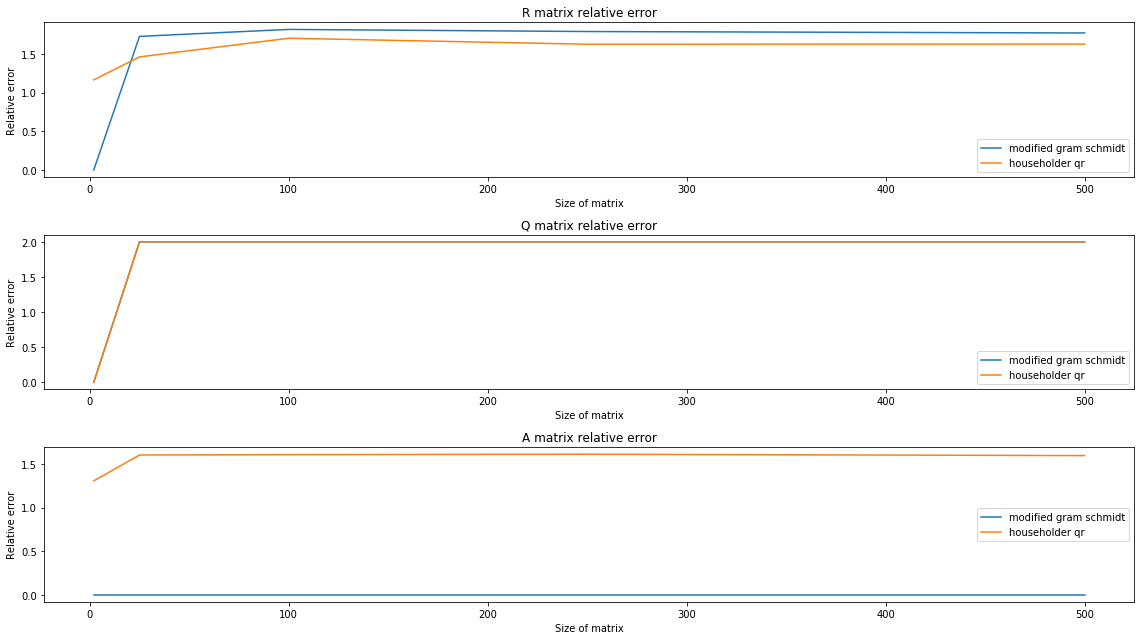

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))

plt.subplot(3,1,1)

plt.plot(ns, rel_error_modified_gsch[:,0])
plt.plot(ns, rel_error_householder[:,0])

plt.legend(['modified gram schmidt', 'householder qr'])
plt.title('R matrix relative error')
plt.xlabel('Size of matrix')
plt.ylabel('Relative error')

plt.subplot(3,1,2)

plt.plot(ns, rel_error_modified_gsch[:,1])
plt.plot(ns, rel_error_householder[:,1])

plt.legend(['modified gram schmidt', 'householder qr'])
plt.title('Q matrix relative error')
plt.xlabel('Size of matrix')
plt.ylabel('Relative error')

plt.subplot(3,1,3)

plt.plot(ns, rel_error_modified_gsch[:,2])
plt.plot(ns, rel_error_householder[:,2])

plt.legend(['modified gram schmidt', 'householder qr'])
plt.title('A matrix relative error')
plt.xlabel('Size of matrix')
plt.ylabel('Relative error')
plt.tight_layout()
plt.show()

## Problem 3 (Word2Vec as Matrix Factorization) 45 pts

In this assignment you are supposed to apply SVD to training your own [word embedding model](https://en.wikipedia.org/wiki/Word_embedding) which maps English words to vectors of real numbers.

Skip-Gram Negative Sampling (SGNS) word embedding model, commonly known as **word2vec** ([Mikolov et al., 2013](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)), is usually optimized by stochastic gradient descent. However, the optimization of SGNS objective can be viewed as implicit matrix factorization objective as was shown in ([Levy and Goldberg, 2015](http://papers.nips.cc/paper/5477-neural-word-embedding-as-implicit-matrix-factorization.pdf)).

###### 1. Notation
Assume we have a text corpus given as a sequence of words $\{w_1,w_2,\dots,w_n\}$ where $n$ may be larger than $10^{12}$ and $w_i \in \mathcal{V}$ belongs to a vocabulary of words $\mathcal{V}$. A word $c \in \mathcal{V}$ is called *a context* of word $w_i$ if they are found together in the text. More formally, given some measure $L$ of closeness between two words (typical choice is $L=2$), a word $c \in \mathcal{V}$ is called a context if $c \in \{w_{i-L}, \dots, w_{i-1}, w_{i+1}, \dots, w_{i+L} \}$ Let $\mathbf{w},\mathbf{c}\in\mathbb{R}^d$ be the *word embeddings* of word $w$ and context $c$, respectively. Assume they are specified by the mapping  $\Phi:\mathcal{V}\rightarrow\mathbb{R}^d$, so $\mathbf{w}=\Phi(w)$. The ultimate goal of SGNS word embedding model is to fit a good mapping $\Phi$.

Let $\mathcal{D}$ be a multiset of all word-contexts pairs observed in the corpus. In the SGNS model, the probability that word-context pair $(w,c)$ is observed in the corpus is modeled as the following distribution:

$$
P(\#(w,c)\neq 0|w,c) = \sigma(\mathbf{w}^\top \mathbf{c}) = \frac{1}{1 + \exp(-\mathbf{w}^\top \mathbf{c})},
$$

where $\#(w,c)$ is the number of times the pair $(w,c)$ appears in $\mathcal{D}$ and $\mathbf{w}^\top\mathbf{c}$ is the scalar product of vectors $\mathbf{w}$ and $\mathbf{c}$. Two important quantities which we will also use further are the number of times the word $w$ and the context $c$ appear in $\mathcal{D}$, which can be computed as

$$
\#(w) = \sum_{c\in\mathcal{V}} \#(w,c), \quad \#(c) = \sum_{w\in\mathcal{V}} \#(w,c).
$$


###### 2. Optimization objective

Vanilla word embedding models are trained by maximizing log-likelihood of observed word-context pairs, namely

$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d}.
$$

Skip-Gram Negative Sampling approach modifies the objective by additionally minimizing the log-likelihood of random word-context pairs, so called *negative samples*. This idea incorporates some useful linguistic information that some number ($k$, usually $k=5$) of word-context pairs *are not* found together in the corpus which usually results in word embeddings of higher quality. The resulting optimization problem is

$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \left( \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) + k \cdot \mathbb{E}_{c'\sim P_\mathcal{D}} \log \sigma (-\mathbf{w}^\top\mathbf{c}) \right) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d},
$$

where $P_\mathcal{D}(c)=\frac{\#(c)}{|\mathcal{D}|}$ is a probability distribution over word contexts from which negative samples are drawn.

[Levy and Goldberg, 2015](http://papers.nips.cc/paper/5477-neural-word-embedding-as-implicit-matrix-factorization.pdf) showed that this objective can be equivalently written as

$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} f(w,c) = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \left( \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) + \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|} \log \sigma (-\mathbf{w}^\top\mathbf{c}) \right) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d},
$$

A crucial observation is that this loss function depends only on the scalar product $\mathbf{w}^\top\mathbf{c}$ but not on embedding $\mathbf{w}$ and $\mathbf{c}$ separately.

###### 3. Matrix factorization problem statement

Let $|\mathcal{V}|=m$, $W \in \mathbb{R}^{m\times d}$ and $C \in \mathbb{R}^{m\times d}$ be matrices, where each row $\mathbf{w}\in\mathbb{R}^d$ of matrix $W$ is the word embedding of the corresponding word $w$ and each row $\mathbf{c}\in\mathbb{R}^d$ of matrix $C$ is the context embedding of the corresponding context $c$. SGNS embeds both words and their contexts into a low-dimensional space $\mathbb{R}^d$, resulting in the word and context matrices $W$ and $C$. The rows of matrix $W$ are typically used in NLP tasks (such as computing word similarities) while $C$ is ignored. It is nonetheless instructive to consider the product $W^\top C = M$. Viewed this way, SGNS can be described as factorizing an implicit matrix $M$ of dimensions $m \times m$ into two smaller matrices.

Which matrix is being factorized? A matrix entry $M_{wc}$ corresponds to the dot product $\mathbf{w}^\top\mathbf{c}$ . Thus, SGNS is factorizing a matrix in which each row corresponds to a word $w \in \mathcal{V}$ , each column corresponds to a context $c \in \mathcal{V}$, and each cell contains a quantity $f(w,c)$ reflecting the strength of association between that particular word-context pair. Such word-context association matrices are very common in the NLP and word-similarity literature. That said, the objective of SGNS does not explicitly state what this association metric is. What can we say about the association function $f(w,c)$? In other words, which matrix is SGNS factorizing? Below you will find the answers.

### Task 1 (theoretical) 5 pts

Solve SGNS optimization problem with respect to the $\mathbf{w}^\top\mathbf{c}$ and show that the matrix being factorized is

$$
M_{wc} = \mathbf{w}^\top\mathbf{c} = \log \left( \frac{\#(w,c) \cdot |\mathcal{D}|}{k\cdot\#(w)\cdot\#(c)} \right)
$$

**Hint:** Denote $x=\mathbf{w}^\top\mathbf{c}$, rewrite SGNG optimization problem in terms of $x$ and solve it.

**Note:** This matrix is called Shifted Pointwise Mutual Information (SPMI) matrix, as its elements can be written as

$$
\text{SPMI}(w,c) = M_{wc} = \mathbf{w}^\top\mathbf{c} = \text{PMI}(w,c) - \log k
$$

and $\text{PMI}(w,c) = \log \left( \frac{\#(w,c) \cdot |\mathcal{D}|}{\#(w)\cdot\#(c)} \right)$ is the well-known [pointwise mutual information](https://en.wikipedia.org/wiki/Pointwise_mutual_information) of $(w,c)$.

*Theoretical task solution*

$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} f(w,c) = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \left( \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) + \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|} \log \sigma (-\mathbf{w}^\top\mathbf{c}) \right) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d},
$$

Let's denote $\mathbf{w}^\top\mathbf{c} \equiv x$ (scalar variable)

$$
\frac{d f}{dx} = \sum \sum \#(\omega , c) \cdot \frac{1}{\sigma(x)} \cdot \frac{d \sigma(x)}{dx} + \frac{k\#(\omega)\#(c)}{|D|} \frac{1}{\sigma(-x)}\frac{d\sigma(-x)}{dx} = 0
$$

$$
\#(w,c)\frac{1+\exp{-x}}{1}\frac{\exp{-x}}{(1+\exp{-x})^2} = \frac{k\#(\omega)\#(c)}{|D|}\frac{1+\exp{x}}{1}\frac{\exp{x}}{(1+\exp{x})^2}
$$

$$
\frac{\#(\omega, c)|D|}{k\#(\omega)\#(c)} = \exp{x}
$$

$$
\ln{\frac{\#(\omega, c)|D|}{k\#(\omega)\#(c)}}=x
$$

### Task 2 (practical) 40 pts

In [2]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

1. Download dataset [enwik8](http://mattmahoney.net/dc/enwik8.zip) of compressed Wikipedia articles and preprocess raw data with Perl script **main_.pl**. This script will clean all unnecessary symbols, make all words to lowercase, and produce only sentences with words.
```
wget http://mattmahoney.net/dc/enwik8.zip
unzip enwik8.zip
mkdir data
perl main_.pl enwik8 > data/enwik8.txt
```

In [3]:
# Load enwik 8
data = np.loadtxt("data/enwik8.txt", dtype=str, delimiter='.')

# Create a list of sentences
sentences = [data[i].split() for i in data.nonzero()[0]]

In [4]:
print (sentences[1249])

['achilles', 'wrath', 'is', 'terrible', 'and', 'he', 'slays', 'many', 'trojan', 'warriors', 'and', 'allies', 'including', 'priam', 's', 'son', 'lycaon', 'whom', 'achilles', 'had', 'previously', 'captured', 'and', 'sold', 'into', 'slavery', 'but', 'who', 'had', 'been', 'returned', 'to', 'troy']


2. Construct the word vocabulary from the obtained sentences which enumerates words which occur more than $r=200$ times in the corpus.

In [5]:
def create_vocabulary(sentences, r=200):
    vocabulary = set()
    wc = dict()
    for sent in sentences:
        for word in sent:
            if word not in wc:
                wc[word] = 1
            else:
                wc[word] += 1
    for key, value in wc.items():
        if value >= r:
            vocabulary.add(key)
    return vocabulary

In [6]:
vocab = create_vocabulary(sentences)

3. Scan the text corpus with sliding window of size $5$ and step $1$ (which corresponds to $L$=2) and construct co-occurrence word-context matrix $D$ with elements $D_{wc}=\#(w,c)$. Please, ignore words which occur less than $r=200$ times, but include them into the sliding window. Please, see the graphical illustration of the procedure described.

![Sliding window](sliding_window.png)

In [7]:
def create_corpus_matrix(sentences, vocabulary):
    from math import ceil, floor
    window = 5
    L = 2
    corpus_matrix = np.zeros((len(vocabulary),len(vocabulary)))
    words_dict_idx = dict()
    i = 0
    for word in vocabulary:
        words_dict_idx[word] = i
        i+=1
    
    for sent in sentences:
        for i in range(len(sent)):
            left = i - floor(window/2)
            right = i + ceil(window/2)
            padding = 0
            if left < 0:
                padding = abs(left)
                left = 0
                
            if right > len(sent):
                right = len(sent)
                
            cut = sent[left:right]            
            
            middle_word = sent[i]
            if middle_word in words_dict_idx:
                idx = words_dict_idx[middle_word]
                middle_word_idx_in_cut = floor(window/2) - padding

                for elem in cut[middle_word_idx_in_cut+1:]:
                    if elem in words_dict_idx:
                        corpus_matrix[idx, words_dict_idx[elem]] += 1

                for elem in cut[:middle_word_idx_in_cut]:
                    if elem in words_dict_idx:
                        corpus_matrix[idx, words_dict_idx[elem]] += 1
    return corpus_matrix

In [8]:
D = create_corpus_matrix(sentences, vocab)

4. To find good word embeddings, [Levy and Goldberg, 2015](http://papers.nips.cc/paper/5477-neural-word-embedding-as-implicit-matrix-factorization.pdf) proposed to find rank-$d$ SVD of Shifted Positive Pointwise Mutual Information (SPPMI) matrix

$$
U \Sigma V^\top \approx \text{SPPMI},
$$

where $\text{SPPMI}(w, c) = \max\left(\text{SPMI}(w, c), 0 \right)$ and $\text{SPMI}(w, c)$ is the element of the matrix $\text{SPPMI}$ at position $(w, c)$.
Then use $W=U\sqrt{\Sigma}$ as word embedding matrix. Your task is to reproduce their results. Write function constructs $\text{SPPMI}$ matrix, computes its SVD and produces word-vectors matrix $W$. Pay attention that $\text{SPPMI}$ matrix is **sparse**!  

In [9]:
from scipy import sparse
from numba import jit

@jit(parallel=True)
def create_M(D,voc_size):
    M = np.zeros((voc_size, voc_size))
    s = np.sum(D)
    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            nwc = D[i,j]
            nw = np.sum(D[i,:])
            nc = np.sum(D[j,:])
            M[i,j] = np.max([np.log((nwc*s)/(k*nw*nc)), 0.0])
    return M

def compute_embeddings(D, k, d=200):
    voc_size = D.shape[0]
    M = create_M(D,voc_size)
    
    print("Ended to calculate M")
    
    M_sparse = sparse.csr_matrix(M) 
    u,s,v = svds(M_sparse, k=d)
    embedding_matrix = np.dot(u, np.diag(np.sqrt(s)))
    return embedding_matrix

In [10]:
k = 5 # negative sampling parameter
W = compute_embeddings(D, k)

/home/dmitriy/MyEnv/other/skoltech/nla/env/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


Ended to calculate M


5. Write class **WordVectors** using provided template.

In [11]:
from scipy.spatial.distance import cosine

class WordVectors:
    
    def __init__(self, vocabulary, embedding_matrix):
        #self.vocab = vocabulary
        self.W = embedding_matrix
        i = 0
        self.vocab = dict()
        for word in vocabulary:
            self.vocab[i] = word
            i+=1
        self.inv_vocab = {v: k for k, v in self.vocab.items()}
        
    def word_vector(self, word):
        """ 
        Takes word and returns its word vector.
        """
        return self.W[self.inv_vocab[word]]
    
    def nearest_words(self, word, top_n=10):
        """ 
        Takes word from the vocabulary and returns its top_n
        nearest neighbors in terms of cosine similarity.
        """
        neighbors = []
        similarity = cosine_similarity(W, W)
        idx = self.inv_vocab[word]
        similarity_for_word = similarity[idx]
        for i in range(len(similarity_for_word)):
            neighbors.append((self.vocab[i], similarity_for_word[i]))
        neighbors = sorted(neighbors, key=lambda x: x[1])[::-1]
        return neighbors[1:top_n+1]

In [12]:
model = WordVectors(vocab, W)

In [13]:
model.nearest_words("anarchism")

[('communism', 0.7916811289121275),
 ('anarcho', 0.7866274463952013),
 ('capitalism', 0.7835661470696681),
 ('socialism', 0.7521567332112499),
 ('liberalism', 0.727094233727135),
 ('criticisms', 0.704527732193991),
 ('capitalist', 0.6621936235916165),
 ('fascism', 0.5649384550242023),
 ('anarchist', 0.5273477653209672),
 ('marxist', 0.5183360211065147)]

In [13]:
model.nearest_words("anarchism")

[('communism', 0.792),
 ('anarcho', 0.787),
 ('capitalism', 0.784),
 ('socialism', 0.752),
 ('liberalism', 0.727),
 ('criticisms', 0.705),
 ('capitalist', 0.662),
 ('fascism', 0.565),
 ('anarchist', 0.527),
 ('marxist', 0.518)]

In [14]:
model.nearest_words("ussr")

[('ukraine', 0.6713467751746178),
 ('russia', 0.629337163206852),
 ('poland', 0.5504100164313642),
 ('belarus', 0.5384153768355007),
 ('yugoslavia', 0.5382061955624559),
 ('romania', 0.5171634039123149),
 ('serbia', 0.5066973712518851),
 ('austria', 0.49986558762309763),
 ('hungary', 0.4661741964233219),
 ('bulgaria', 0.4298324837036329)]

In [14]:
model.nearest_words("ussr")

[('ukraine', 0.671),
 ('russia', 0.629),
 ('poland', 0.55),
 ('belarus', 0.538),
 ('yugoslavia', 0.538),
 ('romania', 0.517),
 ('serbia', 0.507),
 ('austria', 0.5),
 ('hungary', 0.466),
 ('bulgaria', 0.43)]

In [15]:
model.nearest_words("rap")

[('hop', 0.8283432918295276),
 ('hip', 0.8165784239590631),
 ('funk', 0.757762866828034),
 ('rock', 0.7365094164302786),
 ('punk', 0.7063020806986648),
 ('music', 0.6759486602583826),
 ('pop', 0.6662904298474872),
 ('scene', 0.6589626455111236),
 ('band', 0.6568244450058129),
 ('jazz', 0.6249604429360496)]

In [15]:
model.nearest_words("rap")

[('hop', 0.828),
 ('hip', 0.817),
 ('funk', 0.758),
 ('rock', 0.737),
 ('punk', 0.706),
 ('music', 0.676),
 ('pop', 0.666),
 ('scene', 0.659),
 ('band', 0.657),
 ('jazz', 0.625)]

In [16]:
model.nearest_words("numerical")

[('computation', 0.5465058022397296),
 ('mathematical', 0.5315278316790796),
 ('calculations', 0.4994570691960913),
 ('polynomial', 0.4853806562058537),
 ('calculation', 0.47300081538676775),
 ('practical', 0.4601426062722473),
 ('statistical', 0.4555170951220424),
 ('symbolic', 0.45497525761360064),
 ('geometric', 0.44109344247751964),
 ('simplest', 0.43795333700408695)]

In [17]:
model.nearest_words("linear")

[('differential', 0.7594258959608984),
 ('equations', 0.7239119589985681),
 ('equation', 0.6819562007574576),
 ('continuous', 0.6742284479542173),
 ('multiplication', 0.6736136605499375),
 ('integral', 0.672041839604285),
 ('algebraic', 0.6671381718198904),
 ('vector', 0.6540550898957959),
 ('algebra', 0.6302501789190643),
 ('inverse', 0.6221151413953542)]

In [18]:
model.nearest_words("algebra")

[('geometry', 0.794859875511826),
 ('calculus', 0.7298933961965518),
 ('algebraic', 0.7155391263668169),
 ('differential', 0.6874238149617942),
 ('equations', 0.6651955905386229),
 ('equation', 0.64777342071062),
 ('theorem', 0.6471401497627617),
 ('topology', 0.6340296428267992),
 ('linear', 0.6302501789190643),
 ('integral', 0.6183934543302468)]

6. Calculate top 10 nearest neighbours with the corresponding cosine similarities for the words {numerical, linear, algebra} and insert them in the correspoding functions in ```pset2.py```.

# Problem 4 (eigenvalues)  45 pts

### 1. Theoretical tasks

* (5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

* (5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block:

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     & \lambda & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda & 1 \\ 
     \varepsilon & & & & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

Comment how eigenvalues of $J(0)$ are perturbed for large $n$.

*(2.5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real.*

$$\Rightarrow$$
$A$ is normal and Hermitian, then
$$A=A^*, Ax=\lambda x$$
$$x^*A^*=(Ax)^*=(\lambda x)^*=\lambda^*x^*$$
$$x^*A^*=\lambda^*x^*$$
$$x^*A^*x=\lambda^*x^*x$$
$$x^*Ax=\lambda^*x^*x$$
$$x^*\lambda x= \lambda x^* x = \lambda^* x^* x \longrightarrow \lambda = \lambda^*$$

$$\Leftarrow$$
$A$ is normal and has real eigenvalues
Normal matrix is diagonizable, so
$$A=UDU^*$$
Where $U$ is unitary matrix (orthonormal eigenvectors), $D$ is diagonal matrix with eigenvalues on the main diagonal. Simply applying coupling operation we are getting $A = A^*$, so A is Hermitian



*(2.5 pts) Prove that normal matrix is unitary iff its eigenvalues satisfy  |𝜆|=1*
$$\Rightarrow$$
$U$ is unitary, so $U$ is normal
$$I\stackrel{\text{unitary}}{=}UU^*\stackrel{\text{normal, decomposition exist}}{=}VDV^*VD^*V^*= VDD^*V^*$$
So $DD^*=I$ as $VV^*=I$ ($V$ is unitary) $\longrightarrow |\lambda|=1$ 

$$\Leftarrow$$
$X$ is normal matrix and $|\lambda|=1$
$$X=UDU^*$$
$$XX^*=UDU^*UD^*U^*=UDD^*U^*=UIU^*=UU^*=I$$
$X^*X$ similarly, so $X$ is unitary

*(5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block. Comment how eigenvalues of  𝐽(0)  are perturbed for large  𝑛.*

$$
    \det \begin{bmatrix} 
     \lambda-\mu & 1 & & & 0 \\ 
     & \lambda-\mu & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda-\mu & 1 \\ 
     \varepsilon & & & & \lambda-\mu  \\ 
    \end{bmatrix} = 0
$$


Using the first column
$$
 (\lambda-\mu) \det \begin{bmatrix} 
     \lambda-\mu & 1 & & & 0 \\ 
     & \lambda-\mu & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda-\mu & 1 \\ 
    0 & & & & \lambda-\mu  \\ 
    \end{bmatrix}_{(upper\ triang)_{n-1\times n-1\ }} 
    + (-1)^{n+1} \varepsilon \det
    \begin{bmatrix} 
      1 & & & & 0 \\ 
     \lambda-\mu & 1 & & &\\ 
     &  & \ddots & \ddots & \\ 
     & & &  1 & \\ 
     & & &  \lambda-\mu & 1 &\\ 
    \end{bmatrix}_{(lower\ triang)_{n-1\times n-1\ }} = 0
$$

$$
(\lambda - \mu)^n + (-1)^{n+1} \varepsilon = 0 \longrightarrow \mu = \lambda + \sqrt[n]{\varepsilon} \cdot  e^{i\pi + 2i\pi k /n}
$$

### 2. PageRank


#### Damping factor importance

* (5 pts) Write the function ```pagerank_matrix(G)``` that takes an adjacency matrix $G$ (in both sparse and dense formats) as an input and outputs the corresponding PageRank matrix $A$.

* (3 pts) Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>
What is its largest eigenvalue? What multiplicity does it have?


* (5 pts) Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method conveges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.


* (2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 


* (2 pts) Consider the same graph, but with a directed edge that goes from the node 3 to the node 4 being removed. Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?


In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution â€” for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR teleports to a random node from the whole graph with probability $(1-d)$.

* (2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.

* (5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?

Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.


* (2 pts) Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. 

* (1 pts) Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

In [ ]:
# implement the functions in the pset2.py file
from pset2 import pagerank_matrix, power_method, pagerank_matvec


In [45]:
"""
from numba import jit

@jit(parallel=True)
def pagerank_matrix(G, return_dense=True): # 5 pts
    G_sparse = sparse.csr_matrix(G, dtype='float')
    sh = G_sparse.get_shape()
    sums = G_sparse.sum(axis=1)
    for i in range(sh[0]):
        for j in G_sparse.getrow(i).indices:
            G_sparse[i,j] = 1/sums[i,0]
    G_sparse = G_sparse.transpose()
    if return_dense:
        return G_sparse.todense()
    else:
        return G_sparse
"""

In [46]:
pagerank_matrix(np.array([[0,1,1],[1,0,0], [1,0,0]]))

matrix([[0. , 1. , 1. ],
        [0.5, 0. , 0. ],
        [0.5, 0. , 0. ]])

In [189]:
my_graph = np.zeros((5,5))
my_graph[0,1] = 1
my_graph[1,2] = 1
my_graph[2,0] = 1
my_graph[2,1] = 1
my_graph[3,4] = 1
my_graph[4,3] = 1
pagerank_matrix(my_graph)

array([[0. , 0. , 0.5, 0. , 0. ],
       [1. , 0. , 0.5, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. , 0. ]])

Since it's left probability matrix the largest eigenvalue is 1.

Characteristic equation looks like
$$\frac{1}{2}(\lambda+1)(\lambda-1)(\lambda-1)(2\lambda^2+2\lambda+1)$$
The multiplicity is 2

In [213]:
"""
def power_method(A, x0, num_iter): # 5 pts
    l = np.random.rand()
    x = x0

    res = np.zeros(num_iter+1)
    res[0] = np.linalg.norm(np.dot(A,x) - l*x)
    for i in range(num_iter):
        new_x = np.dot(A,x)
        
        norm = np.linalg.norm(new_x)
        l = np.dot(new_x, x)
        
        x = new_x / norm
        
        res[i+1] = np.linalg.norm(np.dot(A,x) - l*x)

    return x, l, res
"""

*(5 pts) Implement the power method for a given matrix  𝐴 , an initial guess  𝑥0  and a number of iterations num_iter. It should be organized as a function power_method(A, x0, num_iter) that outputs approximation to eigenvector  𝑥 , eigenvalue  𝜆  and history of residuals  {‖𝐴𝑥𝑘−𝜆𝑘𝑥𝑘‖2} . Make sure that the method conveges to the correct solution on a matrix  [2−1−12]  which is known to have the largest eigenvalue equal to  3 .*

In [214]:
sample = np.array([[2,-1],[-1,2]])
x,l,res = power_method(sample, np.random.randn(sample.shape[0]), 100)

In [215]:
sample

array([[ 2, -1],
       [-1,  2]])

In [216]:
l

3.0

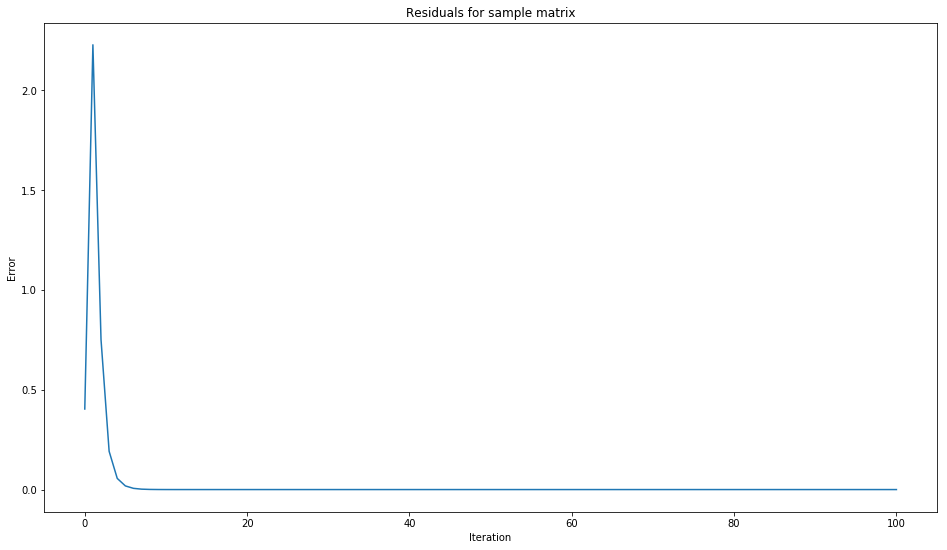

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))

plt.plot(res)

plt.title('Residuals for sample matrix')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

*(2 pts) Run the power method for the graph presented above and plot residuals  ‖𝐴𝑥𝑘−𝜆𝑘𝑥𝑘‖2  as a function of  𝑘  for num_iter=100 and random initial guess x0. Explain the absence of convergence.*

In [219]:
my_graph = np.zeros((5,5))
my_graph[0,1] = 1
my_graph[1,2] = 1
my_graph[2,0] = 1
my_graph[2,1] = 1
my_graph[3,4] = 1
my_graph[4,3] = 1
prm = pagerank_matrix(my_graph)
for i in range(10):
    x,l,res = power_method(prm, np.random.randn(prm.shape[0]), 100)
    print(l)

0.3405956788161604
0.9901282427378311
0.6430742545798771
-0.6052105042746267
-0.6561530392435762
0.7630674173089614
0.5715419290076751
0.7224314697525176
0.9103132973852844
-0.6989211937596935


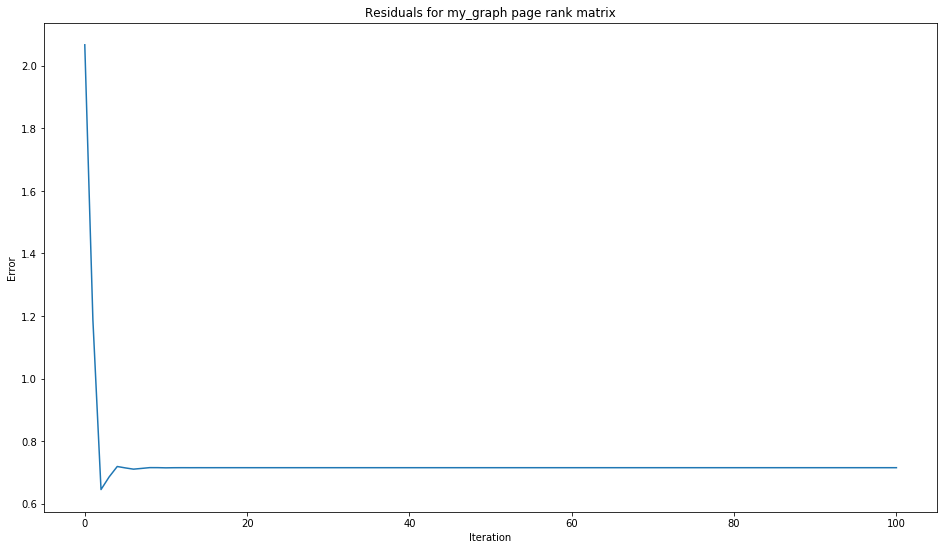

In [220]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))

plt.plot(res)

plt.title('Residuals for my_graph page rank matrix')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

It doesn't converge because $\Big|\frac{\lambda_2}{\lambda_1}\Big| = \Big|\frac{-1}{1}\Big| = 1$

*(2 pts) Consider the same graph, but with a directed edge that goes from the node 3 to the node 4 being removed. Plot residuals as in the previous task and discuss the convergence. Now, run the power method with num_iter=100 for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?*

In [221]:
my_graph = np.zeros((5,5))
my_graph[0,1] = 1
my_graph[1,2] = 1
my_graph[2,0] = 1
my_graph[2,1] = 1
my_graph[4,3] = 1
pagerank_matrix(my_graph)

array([[0. , 0. , 0.5, 0. , 0. ],
       [1. , 0. , 0.5, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. ]])

$$\frac{-1}{2}\lambda\lambda(\lambda-1)(2\lambda^2+2\lambda+1)$$
$$\lambda=0,1,-\frac{1}{2}+\frac{i}{2}, -\frac{1}{2}-\frac{i}{2}$$
$$\Big|\frac{\lambda_2}{\lambda_1}\Big| = \Big|\frac{1/\sqrt{2}}{1}\Big| = \frac{1}{\sqrt{2}}$$

In [225]:
prm = pagerank_matrix(my_graph)
for i in range(10):
    x,l,res = power_method(prm, np.random.randn(prm.shape[0]), 100)
    print(l)
    print(x)

0.9999999999999999
[0.33333333 0.66666667 0.66666667 0.         0.        ]
0.9999999999999989
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]
1.0000000000000027
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]
1.0000000000000004
[0.33333333 0.66666667 0.66666667 0.         0.        ]
1.0000000000000004
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]
0.9999999999999999
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]
0.999999999999998
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]
1.000000000000001
[0.33333333 0.66666667 0.66666667 0.         0.        ]
1.0000000000000024
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]
1.000000000000103
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]


We can see that resulting vectors depend on the initial vector (I mean +-). 

This happens because in + case eigenvector is the component of the initial vector with positive sign coefficient, so we converge to positive eigenvector. Otherwise to negative.

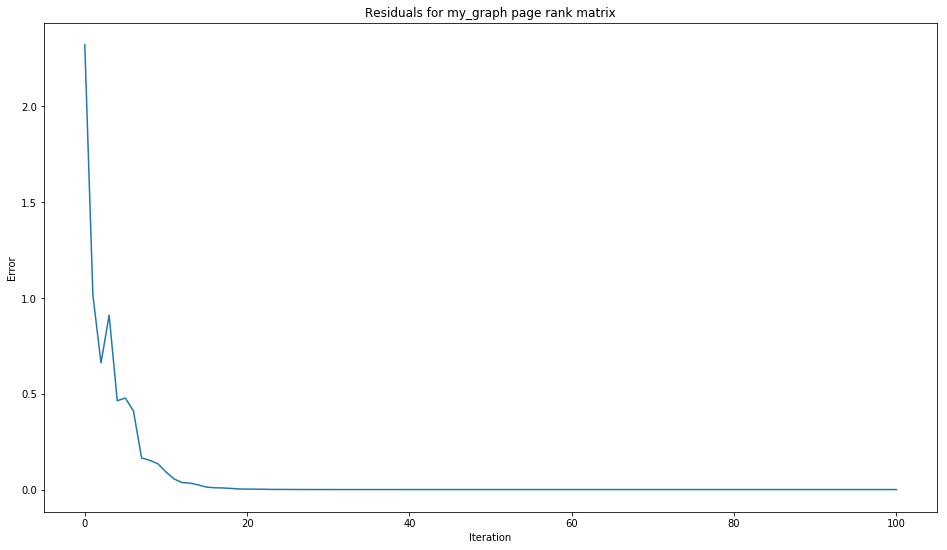

In [223]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))

plt.plot(res)

plt.title('Residuals for my_graph page rank matrix')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

*(2 pts) Now, run the power method with  𝐴𝑑  and plot residuals  ‖𝐴𝑑𝑥𝑘−𝜆𝑘𝑥𝑘‖2  as a function of  𝑘  for  𝑑=0.97 , num_iter=100 and a random initial guess x0.*

In [226]:
my_graph = np.zeros((5,5))
my_graph[0,1] = 1
my_graph[1,2] = 1
my_graph[2,0] = 1
my_graph[2,1] = 1
my_graph[3,4] = 1
my_graph[4,3] = 1
prm = pagerank_matrix(my_graph)
d = 0.97
prmd = d*prm + ((1-d)/prm.shape[0])*np.full((prm.shape[0], prm.shape[1]), 1)
x,l,res = power_method(prmd, np.random.randn(prmd.shape[0]), 100)

In [230]:
l

0.9969970568395099

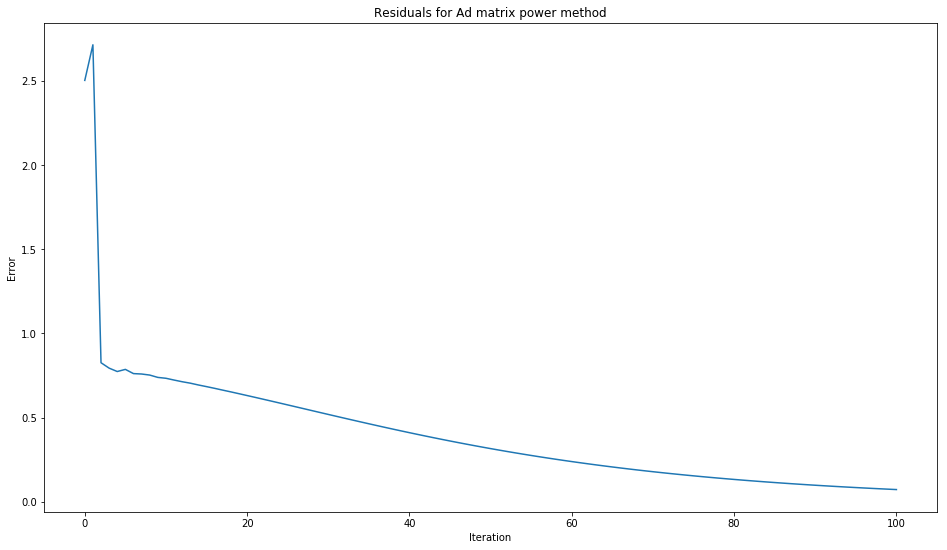

In [227]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))

plt.plot(res)

plt.title('Residuals for Ad matrix power method')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

*(5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix  𝐴𝑑 . How and why is it connected to the damping factor  𝑑 ? What is the convergence rate of the PageRank algorithm when using damping factor?*

In [232]:
print(np.linalg.eigvals(prmd))
print(np.abs(np.linalg.eigvals(prmd)))

[-0.485+0.485j -0.485-0.485j  1.   +0.j     0.97 +0.j    -0.97 +0.j   ]
[0.68589358 0.68589358 1.         0.97       0.97      ]


So we can see that it's exactly $0.97=d$.

The convergence rate will be $\Big|\frac{0.97}{1}\Big| = 0.97$

*(2 pts) Implement fast matrix-vector product for  𝐴𝑑  as a function pagerank_matvec(A, d, x), which takes a PageRank matrix  𝐴  (in sparse format, e.g., csr_matrix), damping factor  𝑑  and a vector  𝑥  as an input and returns  𝐴𝑑𝑥  as an output.*

In [7]:
def pagerank_matvec(A, d, x): # 2 pts
    A_sparse = sparse.csr_matrix(d*A)
    sh = A_sparse.get_shape()
    x_sparse = sparse.csr_matrix(x.reshape((x.shape[0], 1)))
    second_part_value = ((1-d)/sh[0])*np.sum(x)
    second_part_vector = np.full(sh[0], second_part_value)
    second_part_vector_sparse = sparse.csr_matrix(second_part_vector.reshape((second_part_vector.shape[0], 1)))
    return A_sparse.dot(x_sparse) + second_part_vector_sparse 

*(1 pts) Generate a random adjacency matrix of size  10000×10000  with only 100 non-zero elements and compare pagerank_matvec performance with direct evaluation of  𝐴𝑑𝑥 .*

In [12]:
rand_sparse = sparse.random(10000, 10000, density=1e-6, format='csr',
                 data_rvs=np.ones
                 )
x = np.random.randn(10000)
d= 0.97

In [13]:
%%time
pagerank_matvec(rand_sparse, 0.97, x)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.87 ms


<10000x1 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [18]:
%%time
Ad_sparse = sparse.csr_matrix(d*rand_sparse)
sh = Ad_sparse.get_shape()
Ad_sparse += sparse.csr_matrix((1-d)/sh[0]*np.full(sh, 1))
x_sparse = sparse.csr_matrix(x.reshape((x.shape[0], 1)))
Ad_sparse.dot(x_sparse)

CPU times: user 4.83 s, sys: 2.53 s, total: 7.36 s
Wall time: 10.7 s


Computation is way more longer!

#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* (4 pts) Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.
 
 
* (1 pts) In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<).


* (2 pts) Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.


* (1 pts) Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$. Comment on your findings.

In [22]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

*(4 pts) Load the weighted adjacency matrix and the authors list into Python using load_dblp(...) function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix  𝐴  from the adjacency matrix and verify that it is stochastic.*

In [9]:
G.get_shape()

(1766547, 1766547)

In [21]:
print("Density {}".format(G.count_nonzero()/G.get_shape()[0]**2))

Density 4.4986518152305776e-05


In [13]:
author_score = []
scores = G.sum(axis=0)
for idx in range(scores.shape[1]):
    author_score.append((authors[idx], scores[0,idx]))
sorted(author_score, key=lambda x: x[1])[::-1][:10]

[('Scott Shenker', 119853.0),
 ('Andrew Zisserman', 118558.0),
 ('Hari Balakrishnan', 117253.0),
 ('Jiawei Han', 116708.0),
 ('Anil K. Jain', 113874.0),
 ('Cordelia Schmid', 102996.0),
 ('Jitendra Malik', 101657.0),
 ('Ion Stoica', 98017.0),
 ('David E. Culler', 95762.0),
 ('David G. Lowe', 93678.0)]

In [44]:
G = G.astype(bool).astype(int) # transformed to 1

In [15]:
G.getrow(2).todense()

matrix([[0, 0, 1, ..., 0, 0, 0]])

In [49]:
prm = pagerank_matrix(G, return_dense=False)


  0%|          | 347/1766547 [00:40<34:33:56, 14.19it/s]

KeyboardInterrupt: 

In [ ]:
np.savez('prm.npz', prm)

In [ ]:
prm

In [23]:
sample_csr = sparse.random(10, 10, density=1.0, format='csr',
                data_rvs=np.zeros,
                dtype='float'
                 )
sample_csr[0] = np.ones(10)
sample_csr.todense()

matrix([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
sample_csr.sum(axis=1)

matrix([[10.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])